In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df_run = pd.read_csv("obs.csv", index_col=0)
df_run

,agent,reward,action0,action1,obs0,obs1,obs2,obs3,obs4,obs5,...,obs232,obs233,obs234,obs235,obs236,obs237,obs238,obs239,obs240,obs241
0,pursuer_0,0.000000,0.269849,-0.096125,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,pursuer_1,0.000000,0.123310,0.156396,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,pursuer_0,-0.002865,0.146947,0.035707,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,pursuer_1,-0.003983,0.304912,0.061677,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,pursuer_0,-0.001512,-0.074030,-0.128679,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,pursuer_1,-0.003685,-0.040037,0.127178,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,pursuer_0,-0.002360,0.191022,0.036258,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023,pursuer_1,-0.002667,0.057298,-0.153507,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1024,pursuer_0,-0.001944,0.272326,-0.122018,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_run[df_run["reward"] > 0]

,agent,reward,action0,action1,obs0,obs1,obs2,obs3,obs4,obs5,...,obs232,obs233,obs234,obs235,obs236,obs237,obs238,obs239,obs240,obs241
376,pursuer_0,10.009343,-0.001653,-0.186396,1.0,1.0,1.0,1.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
378,pursuer_0,0.008136,-0.041002,-0.143652,1.0,1.0,1.0,1.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
380,pursuer_0,0.008506,-0.141150,-0.168124,1.0,1.0,1.0,1.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
382,pursuer_0,0.007805,0.037231,-0.114374,1.0,1.0,1.0,1.0,1.000000,0.469488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
384,pursuer_0,9.998797,0.142719,0.079598,1.0,1.0,1.0,1.0,0.344531,0.440502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
732,pursuer_0,10.008385,-0.240631,-0.086740,1.0,1.0,1.0,1.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
734,pursuer_0,9.997442,0.012862,0.075049,1.0,1.0,1.0,1.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
965,pursuer_1,10.007073,-0.012152,-0.018798,1.0,1.0,1.0,1.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
967,pursuer_1,0.009552,-0.027479,-0.022310,1.0,1.0,1.0,1.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
969,pursuer_1,0.009292,0.190672,-0.059295,1.0,1.0,1.0,1.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
pursuer_0 = df_run[df_run["agent"] == "pursuer_0"]
pursuer_0 = pursuer_0.reset_index().reset_index()
pursuer_0 = pursuer_0.rename(columns={"level_0": "frame"})
pursuer_0 = pursuer_0.set_index("index")

pursuer_1 = df_run[df_run["agent"] == "pursuer_1"]
pursuer_1 = pursuer_1.reset_index().reset_index()
pursuer_1 = pursuer_1.rename(columns={"level_0": "frame"})
pursuer_1 = pursuer_1.set_index("index")

df_run = pd.concat([pursuer_0, pursuer_1]).sort_index()
df_run

,frame,agent,reward,action0,action1,obs0,obs1,obs2,obs3,obs4,...,obs232,obs233,obs234,obs235,obs236,obs237,obs238,obs239,obs240,obs241
index,,,,,,,,,,,,,,,,,,,,,
0,0,pursuer_0,0.000000,0.269849,-0.096125,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,pursuer_1,0.000000,0.123310,0.156396,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,pursuer_0,-0.002865,0.146947,0.035707,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,pursuer_1,-0.003983,0.304912,0.061677,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,pursuer_0,-0.001512,-0.074030,-0.128679,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,510,pursuer_1,-0.003685,-0.040037,0.127178,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,511,pursuer_0,-0.002360,0.191022,0.036258,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023,511,pursuer_1,-0.002667,0.057298,-0.153507,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
renames = {
    "action0": "horizontal_thrust",
    "action1": "vertical_thrust"
}

n_sensors = 30
for obs in filter(lambda c: c.startswith("obs"), df_run.columns):
    num = int(obs[3:])
    new_name = None
    if num < n_sensors:
        new_name = f"distance_obstacle_{num}"
    elif num < n_sensors * 2:
        new_name = f"distance_barrier_{num - n_sensors}"
    elif num < n_sensors * 3:
        new_name = f"distance_food_{num - n_sensors * 2}"
    elif num < n_sensors * 4:
        new_name = f"speed_food_{num - n_sensors * 3}"
    elif num < n_sensors * 5:
        new_name = f"distance_poison_{num - n_sensors * 4}"
    elif num < n_sensors * 6:
        new_name = f"speed_poison_{num - n_sensors * 5}"
    elif num < n_sensors * 7:
        new_name = f"distance_pursuer_{num - n_sensors * 6}"
    elif num < n_sensors * 8:
        new_name = f"speed_pursuer_{num - n_sensors * 7}"
    elif num == n_sensors * 8:
        new_name = "collision_food"
    elif num == n_sensors * 8 + 1:
        new_name = "collision_poison"
    assert new_name is not None
    renames[obs] = new_name
df_run = df_run.rename(columns=renames)
df_run

,frame,agent,reward,horizontal_thrust,vertical_thrust,distance_obstacle_0,distance_obstacle_1,distance_obstacle_2,distance_obstacle_3,distance_obstacle_4,...,speed_pursuer_22,speed_pursuer_23,speed_pursuer_24,speed_pursuer_25,speed_pursuer_26,speed_pursuer_27,speed_pursuer_28,speed_pursuer_29,collision_food,collision_poison
index,,,,,,,,,,,,,,,,,,,,,
0,0,pursuer_0,0.000000,0.269849,-0.096125,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,pursuer_1,0.000000,0.123310,0.156396,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,pursuer_0,-0.002865,0.146947,0.035707,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,pursuer_1,-0.003983,0.304912,0.061677,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,pursuer_0,-0.001512,-0.074030,-0.128679,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,510,pursuer_1,-0.003685,-0.040037,0.127178,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,511,pursuer_0,-0.002360,0.191022,0.036258,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023,511,pursuer_1,-0.002667,0.057298,-0.153507,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_plot = pd.melt(df_run, id_vars=["agent", "frame"])

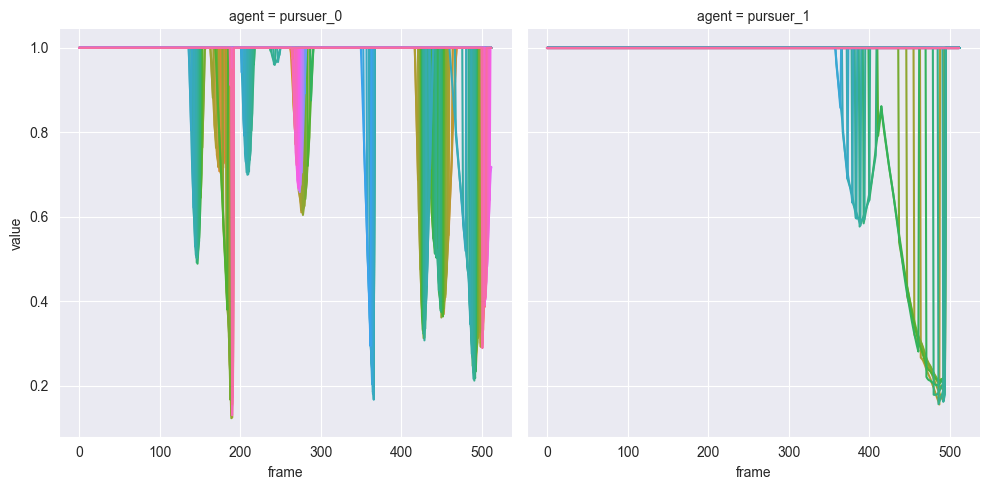

In [38]:
target_cols = set(filter(lambda c: c.startswith("distance_food"), df_run.columns))
to_plot = df_plot[df_plot["variable"].isin(target_cols)]
g = sns.relplot(x="frame", y="value", col="agent", hue="variable",
            data=to_plot,
            kind="line", legend="brief" if len(target_cols) <= 10 else False
)

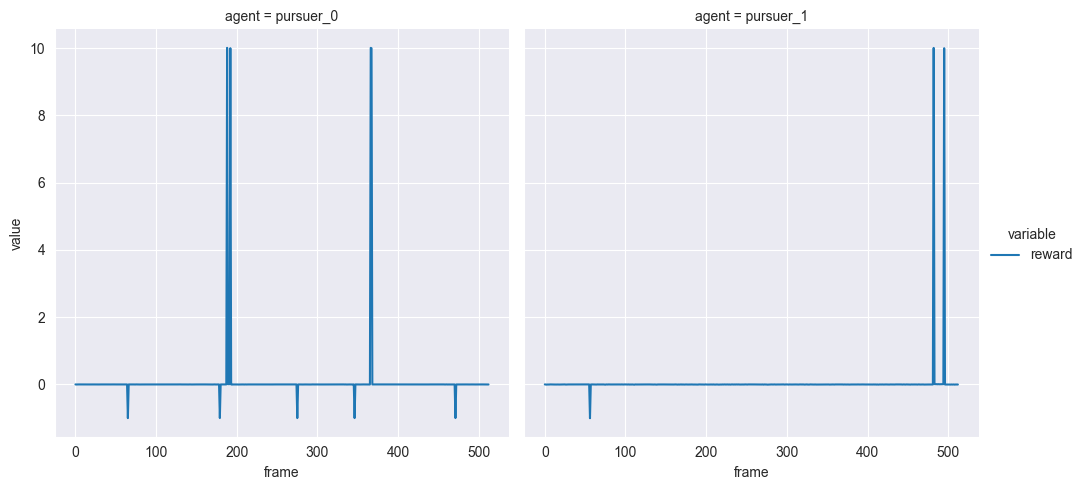

In [39]:
target_cols = ["reward"]
to_plot = df_plot[df_plot["variable"].isin(target_cols)]
g = sns.relplot(x="frame", y="value", col="agent", hue="variable",
            data=to_plot,
            kind="line", legend="brief" if len(target_cols) <= 10 else False
)